In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /Users/ihsanbolum/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [33]:
path = "/Users/ihsanbolum/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1"
import os

In [34]:
print(f"files {os.listdir(path)}")

files ['Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']


In [35]:
train_folder_path = os.path.join(path, "Train")
print(f"Train folder files: {os.listdir(train_folder_path)}") 

Train folder files: ['32', '35', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '6', '28', '17', '1', '10', '19', '26', '8', '21', '38', '36', '31', '30', '37', '39', '41', '24', '23', '4', '15', '3', '12', '40', '2', '13', '5', '14', '22', '25']


In [60]:
class_0_path = os.path.join(train_folder_path, "0")
class_1_path = os.path.join(train_folder_path, "1")
print(class_0_path)

/Users/ihsanbolum/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1/Train/0


In [61]:
first_img_name = os.listdir(class_0_path)[2]
print(f"{first_img_name}")
path_to_1_img = os.path.join(class_0_path, first_img_name)


00000_00006_00003.png


In [62]:
import cv2
img_load = cv2.imread(path_to_1_img)
img_rgb_convert = cv2.cvtColor(img_load, cv2.COLOR_BGR2RGB)

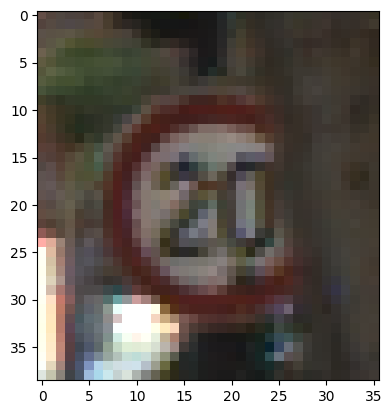

In [63]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb_convert)
plt.show()